#Initial Setup

In [159]:
#importing the required libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support
from statistics import mean

# Reading the data file
df = pd.read_csv('transaction_dataset.csv')
eth_df = df.copy()
df

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,9836,2175,0xff481ca14e6c16b79fc8ab299b4d2387ec8ecdd2,1,12635.10,631.39,58748.48,4,13,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,2.0,,GSENetwork
9837,9837,2176,0xff718805bb9199ebf024ab6acd333e603ad77c85,1,0.00,0.00,0.00,0,0,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
9838,9838,2177,0xff8e6af02d41a576a0c82f7835535193e1a6bccc,1,2499.44,2189.29,261601.88,67,43,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,5.0,,Free BOB Tokens - BobsRepair.com
9839,9839,2178,0xffde23396d57e10abf58bd929bb1e856c7718218,1,0.00,0.00,0.00,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Preprocessing & EDA

In [160]:
#dropping duplicate records
eth_df = eth_df.drop_duplicates()

##Dropping irrelevant columns

In [161]:
eth_df.columns

Index(['Unnamed: 0', 'Index', 'Address', 'FLAG', 'Avg min between sent tnx',
       'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx', ' ERC20 

In [162]:
#dropping columns that play the role of id
eth_df = eth_df.drop(['Index','Unnamed: 0'], axis=1)

In [163]:
# selecting numerical columns that have zero variance
numerical_columns = eth_df.select_dtypes(include='number').columns
zero_var = eth_df[numerical_columns].var() == 0

print(eth_df[numerical_columns].columns[zero_var])
# dropping the zero variance columns
eth_df = eth_df.drop(columns=eth_df[numerical_columns].columns[zero_var])

# dropping the categorical volumes as their values are not related for predicting the target values
categorical_columns = eth_df.select_dtypes(include='object').columns
eth_df = eth_df.drop(categorical_columns, axis = 1)


eth_df

Index([' ERC20 avg time between sent tnx', ' ERC20 avg time between rec tnx',
       ' ERC20 avg time between rec 2 tnx',
       ' ERC20 avg time between contract tnx', ' ERC20 min val sent contract',
       ' ERC20 max val sent contract', ' ERC20 avg val sent contract'],
      dtype='object')


,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name
0,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,...,0.0,58.0,0.00,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,39.0,57.0
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,...,0.0,7.0,0.00,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,1.0,7.0
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,...,0.0,8.0,0.00,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,8.0
3,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,...,0.0,11.0,0.00,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,1.0,11.0
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,...,0.0,27.0,0.00,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,6.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,1,12635.10,631.39,58748.48,4,13,0,11,4,0.004082,...,0.0,2.0,0.00,1.337000e+00,0.668500,0.000000,0.000000e+00,0.000000,0.0,2.0
9837,1,0.00,0.00,0.00,0,0,0,0,0,0.000000,...,0.0,1.0,13.37,1.337000e+01,13.370000,0.000000,0.000000e+00,0.000000,0.0,1.0
9838,1,2499.44,2189.29,261601.88,67,43,0,31,44,0.001078,...,0.0,5.0,0.00,1.500000e+03,300.693901,0.000000,0.000000e+00,0.000000,0.0,5.0
9839,1,0.00,0.00,0.00,0,1,0,1,0,0.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [164]:
#checking the unique values of some of the columns and their value counts
print(eth_df['max val sent to contract'].unique())
print(eth_df['max val sent to contract'].value_counts())
print(eth_df['min value sent to contract'].unique())
print(eth_df['min value sent to contract'].value_counts())
print(eth_df['avg value sent to contract'].unique())
print(eth_df['avg value sent to contract'].value_counts())
print(eth_df['total ether sent contracts'].unique())
print(eth_df['total ether sent contracts'].value_counts())

[0.       0.02     0.01     0.046029]
0.000000    9838
0.020000       1
0.010000       1
0.046029       1
Name: max val sent to contract, dtype: int64
[0.   0.02 0.01]
0.00    9839
0.02       1
0.01       1
Name: min value sent to contract, dtype: int64
[0.       0.02     0.01     0.023014]
0.000000    9838
0.020000       1
0.010000       1
0.023014       1
Name: avg value sent to contract, dtype: int64
[0.         0.02       0.01       0.04602871]
0.000000    9838
0.020000       1
0.010000       1
0.046029       1
Name: total ether sent contracts, dtype: int64


As the above columns' values are all 0 except for a very few records, they should be dropped:

In [165]:
eth_df = eth_df.drop(['max val sent to contract','min value sent to contract','avg value sent to contract', 'total ether sent contracts'],axis = 1)

In [166]:
eth_df.describe()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,...,9012.000000,9012.000000,9012.000000,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.000000,9012.000000
mean,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,25.840159,43.845153,...,0.003440,4.901909,485.614688,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,1.384931,4.826676
std,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,263.820410,325.929139,...,0.065698,17.246576,16883.278712,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,6.735121,16.678607
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,1.000000,0.001000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,2.000000,0.095856,...,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000
75%,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,3.000000,2.000000,...,0.000000,2.000000,0.001523,9.900000e+01,2.946467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2.000000
max,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,9287.000000,10000.000000,...,3.000000,782.000000,990000.000000,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,213.000000,737.000000


##Handling Missing Values

In [167]:
#checking for missing values
missing_values = eth_df.isnull()

#counting the missing values in each column
missing_values_count = missing_values.sum()

print("Missing values count in each column:")
print(missing_values_count)

#total number of missing values in the df
total_missing_values = missing_values.sum().sum()
print("\nTotal number of missing values:", total_missing_values)


Missing values count in each column:
FLAG                                                      0
Avg min between sent tnx                                  0
Avg min between received tnx                              0
Time Diff between first and last (Mins)                   0
Sent tnx                                                  0
Received Tnx                                              0
Number of Created Contracts                               0
Unique Received From Addresses                            0
Unique Sent To Addresses                                  0
min value received                                        0
max value received                                        0
avg val received                                          0
min val sent                                              0
max val sent                                              0
avg val sent                                              0
total transactions (including tnx to create contract      0
tot

In [168]:
#replacing missing values with 0
numerical_columns = eth_df.select_dtypes(include='number').columns
for column in numerical_columns:
    eth_df[column] = eth_df[column].fillna(0)


In [169]:
eth_df

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name
0,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,...,0.0,58.0,0.00,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,39.0,57.0
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,...,0.0,7.0,0.00,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,1.0,7.0
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,...,0.0,8.0,0.00,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,8.0
3,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,...,0.0,11.0,0.00,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,1.0,11.0
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,...,0.0,27.0,0.00,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,6.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,1,12635.10,631.39,58748.48,4,13,0,11,4,0.004082,...,0.0,2.0,0.00,1.337000e+00,0.668500,0.000000,0.000000e+00,0.000000,0.0,2.0
9837,1,0.00,0.00,0.00,0,0,0,0,0,0.000000,...,0.0,1.0,13.37,1.337000e+01,13.370000,0.000000,0.000000e+00,0.000000,0.0,1.0
9838,1,2499.44,2189.29,261601.88,67,43,0,31,44,0.001078,...,0.0,5.0,0.00,1.500000e+03,300.693901,0.000000,0.000000e+00,0.000000,0.0,5.0
9839,1,0.00,0.00,0.00,0,1,0,1,0,0.500000,...,0.0,0.0,0.00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.0


##Normalization of the data: Min-Max

In [170]:
numerical_columns = eth_df.select_dtypes(include='number').columns
numerical_columns

Index(['FLAG', 'Avg min between sent tnx', 'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 min val rec', ' ERC20 max val rec', ' ERC20 avg val rec',
       ' ERC20 min val sent', ' ERC20 max val sent', ' ERC20 avg val sent',
       ' ERC20 uniq sent token name', ' ERC20 uniq rec token name'],
      dtype='

In [171]:
# all numerical columns except FLAG
numerical_columns = eth_df.select_dtypes(include='number').columns[1:]

# initializing the MinMaxScaler
scaler = MinMaxScaler()

# applying Min-Max scaling
eth_df[numerical_columns] = scaler.fit_transform(eth_df[numerical_columns])


eth_df.describe()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9.841000e+03,...,9841.000000,9841.000000,9841.000000,9.841000e+03,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000
mean,0.221421,0.011822,0.016602,0.111687,0.011593,0.016370,0.000373,0.003036,0.002782,4.384515e-03,...,0.001050,0.005740,0.000449,1.147012e-04,2.308390e-04,0.000108,0.000107,0.000103,0.005954,0.005997
std,0.415224,0.049935,0.047870,0.165197,0.075723,0.094084,0.014152,0.029865,0.028407,3.259291e-02,...,0.020959,0.021177,0.016320,1.008383e-02,1.188418e-02,0.010082,0.010081,0.010081,0.030313,0.021732
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000162,0.000100,0.000100,0.000000,0.000100,0.000108,1.000000e-07,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000040,0.001057,0.023857,0.000300,0.000400,0.000000,0.000200,0.000215,9.585600e-06,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.001314,0.011366,0.155546,0.001100,0.002700,0.000000,0.000500,0.000323,2.000000e-04,...,0.000000,0.002558,0.000000,1.900559e-11,7.754406e-10,0.000000,0.000000,0.000000,0.000000,0.002714
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,...,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000


##Correlation Analysis

Text(0.5, 1.0, 'Correlation Heatmap')

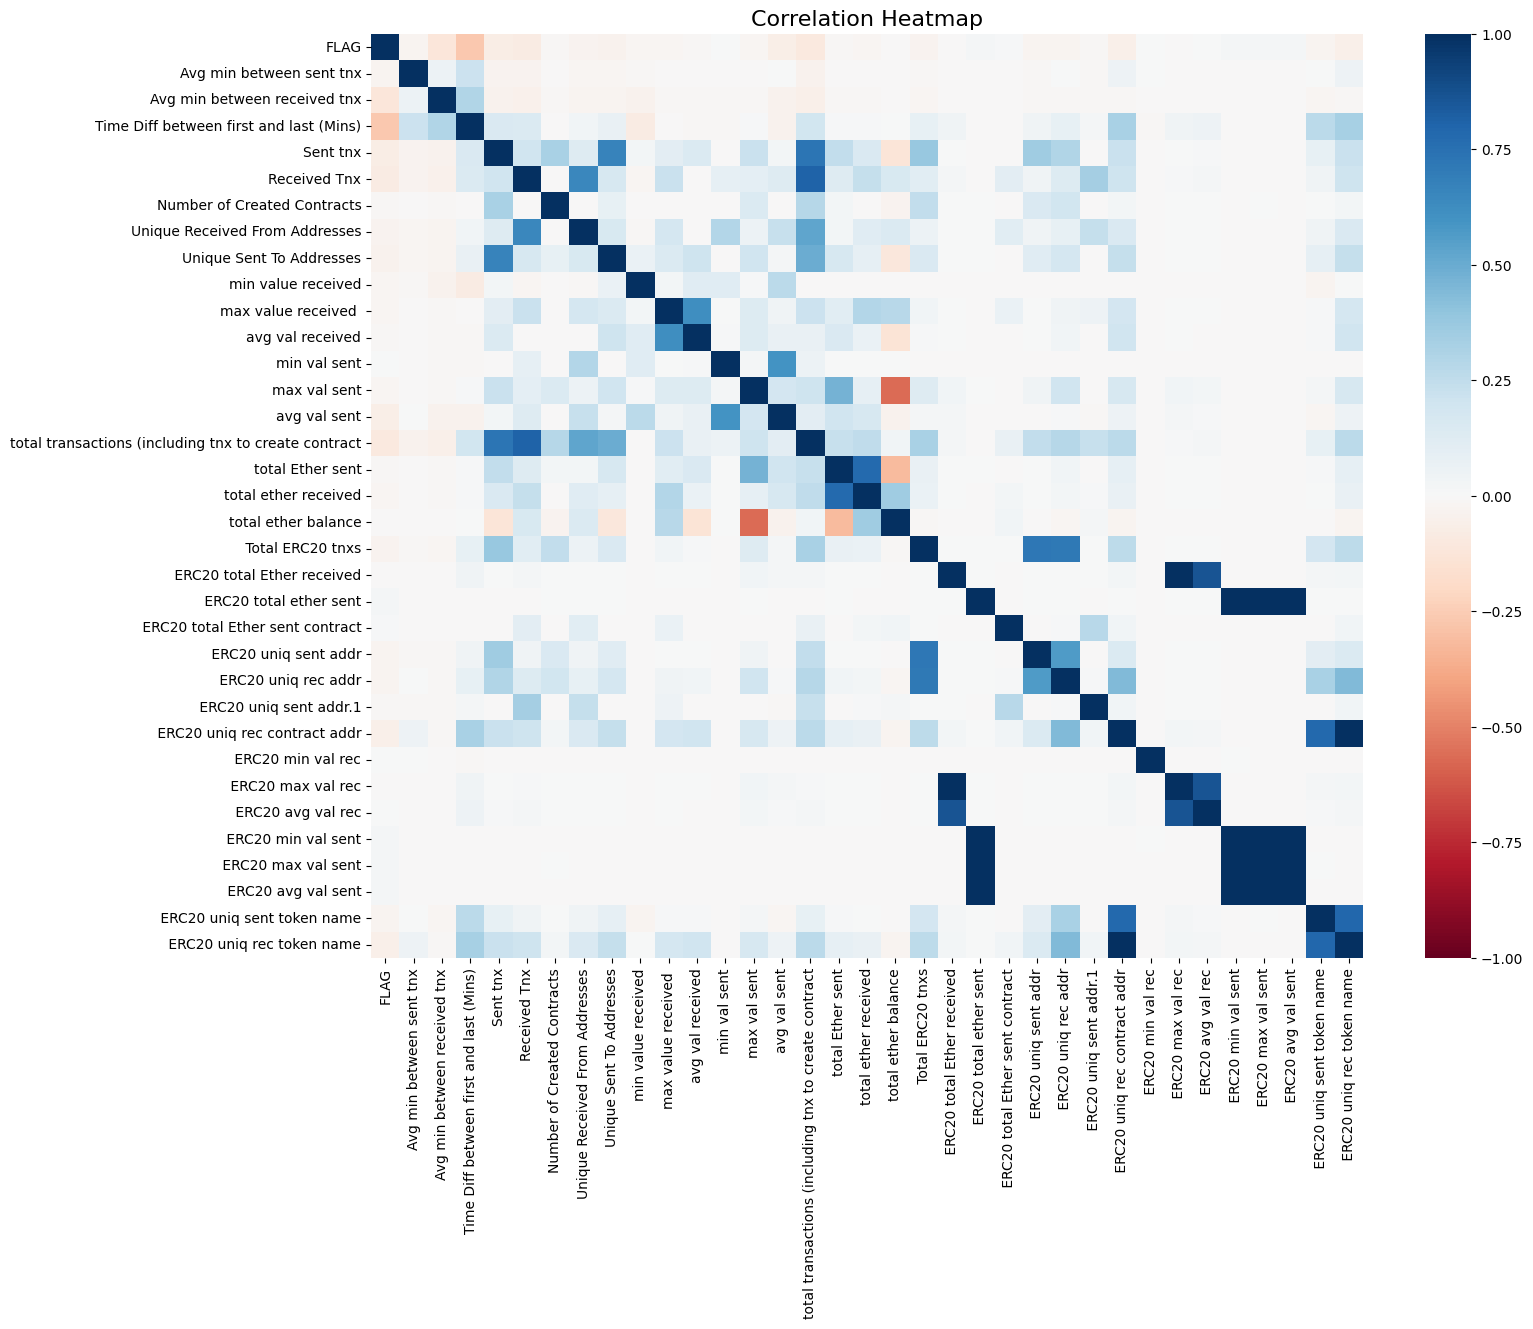

In [172]:
# calculating the correlation between predictors
correlation = eth_df.corr()

# plotting the correlation heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation, cmap='RdBu', vmin = -1, vmax = 1)
plt.title('Correlation Heatmap', fontsize=16)


In [173]:
# table of correlation
correlation

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name
FLAG,1.000000,-0.029754,-0.118533,-0.269354,-0.078006,-0.079316,-0.013711,-0.031941,-0.045584,-0.021641,...,-0.011148,-0.061948,0.004434,-0.005510,0.003132,0.019023,0.018770,0.018835,-0.026290,-0.062397
Avg min between sent tnx,-0.029754,1.000000,0.060979,0.214722,-0.032289,-0.035735,-0.006186,-0.015912,-0.017688,-0.014886,...,-0.011862,0.048672,0.004998,-0.002260,-0.002829,-0.001511,-0.001841,-0.001792,0.003310,0.050295
Avg min between received tnx,-0.118533,0.060979,1.000000,0.303897,-0.040419,-0.053478,-0.008378,-0.029571,-0.025747,-0.045753,...,-0.013750,-0.010926,-0.007794,-0.003326,-0.005241,-0.003545,-0.003568,-0.003521,-0.016831,-0.010891
Time Diff between first and last (Mins),-0.269354,0.214722,0.303897,1.000000,0.154480,0.148376,-0.003881,0.037043,0.071140,-0.084996,...,0.022216,0.326570,-0.008921,0.046278,0.049160,-0.006174,-0.005606,-0.006148,0.269025,0.331789
Sent tnx,-0.078006,-0.032289,-0.040419,0.154480,1.000000,0.198455,0.320603,0.130064,0.670014,0.024015,...,-0.007671,0.222466,-0.003480,0.004445,0.009104,-0.001407,-0.000870,-0.001271,0.082239,0.223452
Received Tnx,-0.079316,-0.035735,-0.053478,0.148376,0.198455,1.000000,-0.003838,0.648655,0.164112,-0.022936,...,0.337827,0.204705,-0.004043,0.015522,0.019382,-0.001735,-0.000584,-0.000763,0.045475,0.205809
Number of Created Contracts,-0.013711,-0.006186,-0.008378,-0.003881,0.320603,-0.003838,1.000000,-0.002211,0.084598,-0.001542,...,-0.000967,0.029512,-0.000724,0.000946,0.002096,-0.000067,0.000173,-0.000046,0.006475,0.030619
Unique Received From Addresses,-0.031941,-0.015912,-0.029571,0.037043,0.130064,0.648655,-0.002211,1.000000,0.159829,-0.012939,...,0.241752,0.149281,-0.001784,0.001691,0.003741,-0.000961,-0.000178,-0.000467,0.042108,0.150407
Unique Sent To Addresses,-0.045584,-0.017688,-0.025747,0.071140,0.670014,0.164112,0.084598,0.159829,1.000000,0.070145,...,-0.004908,0.238800,-0.002093,0.003696,0.005412,-0.000875,-0.000348,-0.000738,0.086414,0.238982
min value received,-0.021641,-0.014886,-0.045753,-0.084996,0.024015,-0.022936,-0.001542,-0.012939,0.070145,1.000000,...,-0.006740,-0.000294,-0.000847,-0.001528,-0.002610,-0.001366,-0.001397,-0.001350,-0.026315,0.000271


In [174]:
# finding and dropping the highly correlated columns
correlated_columns = set()
# looping through the upper triangle of the correlation matrix (except the diagonal)
for i in range(len(correlation.columns)):
    for j in range(i):
        if abs(correlation.iloc[i, j]) >= 0.9:
            correlated_columns.add(correlation.columns[i])

eth_df = eth_df.drop(columns=correlated_columns)

eth_df

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 avg val rec,ERC20 uniq sent token name
0,0,0.001962,0.002268,0.360530,0.0721,0.0089,0.0000,0.0040,0.012706,0.000000e+00,...,3.558783e-05,3.178854e-04,0.0,0.004558,0.012579,0.0,0.074169,0.000000,1.540361e-05,0.183099
1,0,0.029536,0.006136,0.623173,0.0094,0.0008,0.0000,0.0005,0.001507,0.000000e+00,...,4.034202e-10,2.018580e-11,0.0,0.000152,0.001165,0.0,0.008951,0.000000,3.342608e-09,0.004695
2,0,0.572163,0.005048,0.264330,0.0002,0.0010,0.0000,0.0010,0.000215,1.131190e-05,...,5.215016e-10,0.000000e+00,0.0,0.000000,0.001631,0.0,0.010230,0.000000,3.780868e-09,0.000000
3,0,0.023751,0.032737,0.203368,0.0025,0.0009,0.0000,0.0007,0.001400,0.000000e+00,...,1.711071e-08,1.018949e-07,0.0,0.000304,0.002562,0.0,0.014066,0.000000,9.021965e-08,0.004695
4,0,0.000085,0.022207,0.195652,0.4598,0.0020,0.0001,0.0007,0.002046,0.000000e+00,...,1.628264e-07,1.103035e-06,0.0,0.000608,0.005358,0.0,0.034527,0.000000,2.861783e-07,0.028169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,1,0.029364,0.001309,0.030053,0.0004,0.0013,0.0000,0.0011,0.000431,4.082000e-07,...,1.336973e-12,0.000000e+00,0.0,0.000000,0.000466,0.0,0.002558,0.000000,3.877203e-11,0.000000
9837,1,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.000000,0.000000e+00,...,1.336973e-11,0.000000e+00,0.0,0.000000,0.000233,0.0,0.001279,0.000014,7.754406e-10,0.000000
9838,1,0.005809,0.004540,0.133821,0.0067,0.0043,0.0000,0.0031,0.004738,1.078000e-07,...,1.503439e-09,0.000000e+00,0.0,0.000000,0.001165,0.0,0.006394,0.000000,1.743981e-08,0.000000
9839,1,0.000000,0.000000,0.000000,0.0000,0.0001,0.0000,0.0001,0.000000,5.000000e-05,...,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000


### Imbalanced Data set

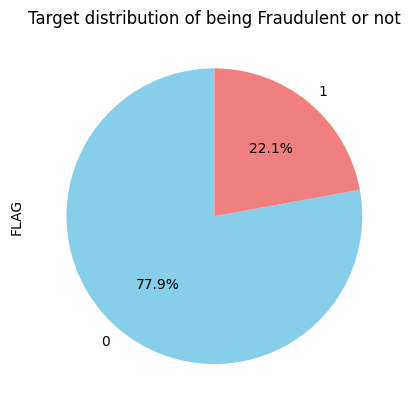

In [175]:
# plotting the proportions of fraudluent and non-fraudulent cases
eth_df['FLAG'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Target distribution of being Fraudulent or not')
plt.show()


# Test and Train sets

In [176]:
n = 10
# defining metrics for each class
precision_0 = list(range(n))
precision_1 = list(range(n))
recall_0 = list(range(n))
recall_1 = list(range(n))
f1_score_0 = list(range(n))
f1_score_1 = list(range(n))
support_0 = list(range(n))
support_1 =list(range(n))


for i in range(10):
  # splitting the df into train and test
  df_train, df_test = train_test_split(eth_df, test_size=0.1, stratify=eth_df['FLAG'])
  x_test = df_test.iloc[:,1:]
  y_test = df_test['FLAG']

  # balancing the train set
  fraudulent_sample = df_train[df_train["FLAG"] == 1]
  non_fraudulent_sample = df_train[df_train["FLAG"] == 0].sample(len(fraudulent_sample), random_state = 42)
  balanced_data = pd.concat([non_fraudulent_sample, fraudulent_sample], axis = 0)
  y_train = balanced_data["FLAG"]
  x_train = balanced_data.iloc[:,1:]

  # initializing and training the kNN classifier
  # k=10
  knn_classifier = KNeighborsClassifier(n_neighbors=10)
  knn_classifier.fit(x_train, y_train)

  # predicting on the test set
  y_pred = knn_classifier.predict(x_test)

  # evaluation for both classes
  precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred, average=None)
  precision_0[i] = precision[0]
  precision_1[i] = precision[1]
  recall_0[i] = recall[0]
  recall_1[i] = recall[1]
  f1_score_0[i] = f1_score[0]
  f1_score_1[i] = f1_score[1]
  support_0[i] = support[0]
  support_1[i] = support[1]

# averaging the 10 individual results
precision = [mean(precision_0),mean(precision_1)]
recall = [mean(recall_0), mean(recall_1)]
f1_score = [mean(f1_score_0), mean(f1_score_1)]
support = [mean(support_0), mean(support_1)]
print(" precision: ", precision, "\n recall: ", recall, "\n f1_score: ", f1_score, "\n support: ", support)



 precision:  [0.9569523464303206, 0.7080941878179255] 
 recall:  [0.8992177314211213, 0.8573394495412844] 
 f1_score:  [0.9271191810706809, 0.7752071634054991] 
 support:  [767, 218]
